# [Introduction to LangChain](https://python.langchain.com/docs/introduction/)

LangChain is a framework for developing applications powered by large language models (LLMs).

LangChain simplifies every stage of the LLM application lifecycle:

- Development: Build your applications using LangChain's open-source [components](https://python.langchain.com/docs/concepts/) and [third-party integrations](https://python.langchain.com/docs/integrations/providers/). Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.
- Productionization: Use [LangSmith](https://docs.smith.langchain.com/?_gl=1*lbz7dz*_ga*MTg3MzIxNzgyNS4xNzU0ODgzNTUz*_ga_47WX3HKKY2*czE3NTQ5MDgwMDgkbzQkZzEkdDE3NTQ5MTAwMTckajYwJGwwJGgw) to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.
- Deployment: Turn your LangGraph applications into production-ready APIs and Assistants with [LangGraph Platform](https://docs.langchain.com/langgraph-platform?__hstc=5909356.bc36eceb44175eebbb2b372b7bd252b1.1754883571704.1754883571704.1754910222298.2&__hssc=5909356.2.1754910222298&__hsfp=2562008206&_gl=1*iime50*_gcl_au*NTc3MzUwMjY4LjE3NTQ5MTAyMDM.*_ga*MTg3MzIxNzgyNS4xNzU0ODgzNTUz*_ga_47WX3HKKY2*czE3NTQ5MDgwMDgkbzQkZzEkdDE3NTQ5MTAyNDkkajYwJGwwJGgw).

LangChain implements a standard interface for large language models and related technologies, such as embedding models and vector stores, and integrates with hundreds of providers. See the integrations page for more.

<img src="https://python.langchain.com/svg/langchain_stack_112024_dark.svg" width="800">

LangChain uses LLMs to build applications for various use cases. Created by Harrison Chase, it was first released as an open-source project in October 2022. To date (11-8-25), it has accumulated `113K` stars on [GitHub](https://github.com/langchain-ai/langchain) and has over `3.7k+` contributors.

<img src="https://atsailabstorage.blob.core.windows.net/atsusecases/langchain-starhistory.png" width="800">
Source: [LangChain Star History](https://www.star-history.com/#langchain-ai/langchain&Date)

# LLM-Powered Chatbot with Conversation History

We'll go over an example of how to design and implement an LLM-powered chatbot. This chatbot will be able to have a **conversation** and **remember previous interactions** with a chat model.

Source: [LangChain Docs](https://python.langchain.com/docs/tutorials/chatbot/)

In [2]:
import os
from dotenv import load_dotenv

In [ ]:
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [2]:
from langchain.chat_models import init_chat_model

model = init_chat_model("openai/gpt-oss-120b", model_provider="groq")

`ChatModels` in LangChain work like special objects called "Runnables", which means they have a common way you can use them.
If you just want to run the model, you give it a list of messages and use the `.invoke` method — that’s how you “talk” to it and get a response.

It’s like: “Put your messages in a box, hand it to the .invoke button, and the model will answer.”

In [3]:
from langchain_core.messages import HumanMessage

model.invoke([HumanMessage(content="Hi! I am Ahmed.")])

AIMessage(content='Hello Ahmed! 👋 Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi! I am Ahmed." We should greet them, ask how we can help. Follow guidelines: be friendly, no disallowed content.'}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 77, 'total_tokens': 141, 'completion_time': 0.120820524, 'prompt_time': 0.004475829, 'queue_time': 0.043859801, 'total_time': 0.125296353}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_085e8f07e2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c3abdf58-20a1-4bd1-9a64-bdf1993ed035-0', usage_metadata={'input_tokens': 77, 'output_tokens': 64, 'total_tokens': 141})

The model on its own does not have any concept of state. For example, if you ask a followup question:

In [4]:
model.invoke([HumanMessage(content="What's my name?")])

AIMessage(content='I don’t have any information about your name. Could you let me know what you’d like me to call you?', additional_kwargs={'reasoning_content': 'The user asks "What\'s my name?" We have no prior conversation. The user hasn\'t provided their name. According to policy, we cannot guess or fabricate personal info. We can ask for clarification. So we should respond asking for their name or stating we don\'t have that info.'}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 75, 'total_tokens': 164, 'completion_time': 0.160853452, 'prompt_time': 0.004359095, 'queue_time': 0.050482512, 'total_time': 0.165212547}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4a19b1544c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--03c8295e-9a28-4f76-8821-7c871b485d5a-0', usage_metadata={'input_tokens': 75, 'output_tokens': 89, 'total_tokens': 164})

We can see that it doesn't take the previous conversation turn into context, and cannot answer the question. This makes for a terrible chatbot experience!

To get around this, we need to pass the entire [conversation history](https://python.langchain.com/docs/concepts/chat_history/) into the model. Let's see what happens when we do that:

In [7]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I am Ahmed."),
        AIMessage(
            content="Hello Ahmed! 👋 Nice to meet you. How can I assist you today?"
        ),
        HumanMessage(content="Who am I?"),
    ]
)

AIMessage(content='You introduced yourself as **Ahmed**. If there’s anything specific you’d like to share or discuss—whether it’s a question, a topic you’re interested in, or something you need help with—just let me know! 😊', additional_kwargs={'reasoning_content': 'User asks "Who am I?" They introduced themselves as Ahmed. We can respond with a friendly answer, maybe ask for more details. Should be brief.'}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 108, 'total_tokens': 196, 'completion_time': 0.158821381, 'prompt_time': 0.005547022, 'queue_time': 0.001862829, 'total_time': 0.164368403}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_45f51928b5', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9a1e0998-3784-486d-9f82-d205a284d320-0', usage_metadata={'input_tokens': 108, 'output_tokens': 88, 'total_tokens': 196})

And now we can see that we get a good response!

This is the basic idea underpinning a chatbot's ability to interact conversationally. So how do we best implement this?

# Message persistence

LangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.

Wrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.

LangGraph comes with a simple in-memory checkpointer, which we use below. See its [documentation](https://langchain-ai.github.io/langgraph/concepts/persistence/?_gl=1*fi5jbl*_gcl_au*MTE0NDQ3MDcyNC4xNzU0OTExODMx*_ga*MTU2Mzg1ODA3NS4xNzQ5NjMyNjk5*_ga_47WX3HKKY2*czE3NTQ5MTE4MjYkbzckZzEkdDE3NTQ5MTE4MzckajQ5JGwwJGgw) for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).

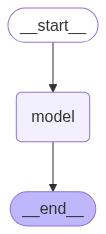

In [12]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}


# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)
app

We now need to create a `config` that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a `thread_id`. This should look like:

In [13]:
config = {"configurable": {"thread_id": "abc123"}}

This enables us to support multiple conversation threads with a single application, a common requirement when your application has multiple users.

We can then invoke the application:

In [35]:
query = "Hi! I am Ahmed."

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config)

output

{'messages': [HumanMessage(content='Hi! I am Ahmed.', additional_kwargs={}, response_metadata={}, id='84e8f04b-9fc0-495f-b3ae-12b8feaf24a3'),
  AIMessage(content='Hello Ahmed! 👋 Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi! I am Ahmed." We should greet them, ask how we can help. Follow guidelines: be friendly, no disallowed content.'}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 77, 'total_tokens': 141, 'completion_time': 0.115650252, 'prompt_time': 0.004500526, 'queue_time': 0.001688329, 'total_time': 0.120150778}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_ce855234b5', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d01c1df4-c72c-455b-bc07-80a42675dd85-0', usage_metadata={'input_tokens': 77, 'output_tokens': 64, 'total_tokens': 141}),
  HumanMessage(content='Do you know my name?', additional_kwargs={}, response_metada

In [32]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you told me your name is **Ahmed**. 😊 Is there anything specific you’d like to talk about or need help with today?


In [20]:
query = "Do you know my name?"

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you introduced yourself as **Ahmed**. How can I help you today, Ahmed?


Great! Our chatbot now remembers things about us. If we change the config to reference a different `thread_id`, we can see that it starts the conversation fresh.

In [24]:
new_config = {"configurable": {"thread_id": "xyz890"}}

query = "Do you know my name?"

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config=new_config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

I don’t have any information about your name unless you’ve shared it with me in this conversation. If you’d like me to address you by name, just let me know what you’d like to be called!


However, we can always go back to the original conversation (since we are persisting it in a database)

In [25]:
query = "Do you know my name?"

input_messages = [HumanMessage(query)]

output = app.invoke({"messages": input_messages}, config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you told me your name is **Ahmed**. 😊 Is there anything specific you’d like to talk about or need help with today?


This is how we can support a chatbot having conversations with many users!